In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# web-scraping

In [2]:
Product_URL='https://www.amazon.in/ViewSonic-TD1655-Portable-Touchscreen-Frameless/dp/B08778F756/ref=pd_ci_mcx_mh_mcx_views_0?pd_rd_w=nVsyw&content-id=amzn1.sym.cd312cd6-6969-4220-8ac7-6dc7c0447352%3Aamzn1.symc.ca948091-a64d-450e-86d7-c161ca33337b&pf_rd_p=cd312cd6-6969-4220-8ac7-6dc7c0447352&pf_rd_r=NEYPWNHJCWEFDCEB1PS2&pd_rd_wg=oOj5q&pd_rd_r=c320d5cb-95c6-4a97-a4db-adf1cec4233b&pd_rd_i=B08778F756&th=1'
Product_Review_URL='https://www.amazon.in/ViewSonic-TD1655-Portable-Touchscreen-Frameless/dp/B08778F756/ref=pd_ci_mcx_mh_mcx_views_0?pd_rd_w=nVsyw&content-id=amzn1.sym.cd312cd6-6969-4220-8ac7-6dc7c0447352%3Aamzn1.symc.ca948091-a64d-450e-86d7-c161ca33337b&pf_rd_p=cd312cd6-6969-4220-8ac7-6dc7c0447352&pf_rd_r=NEYPWNHJCWEFDCEB1PS2&pd_rd_wg=oOj5q&pd_rd_r=c320d5cb-95c6-4a97-a4db-adf1cec4233b&pd_rd_i=B08778F756&th=1'

In [3]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': Product_URL,
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

Looping through multiple pages

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [6]:

for x in tqdm_notebook(range(160)):
    soup = get_soup(Product_Review_URL)
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGreat portable touch scree...,5.0,It is a great product and i am fully satisfied...,Reviewed in India on 20 July 2021
1,4.0 out of 5 stars\nIt's best only with Type C...,4.0,Product is good but but buy only if you have t...,Reviewed in India on 31 March 2022
2,5.0 out of 5 stars\nWith Mac mini m2 touchscreen,5.0,This product touchscreen is working with Mac m...,Reviewed in India on 18 November 2023
3,1.0 out of 5 stars\nToo expensive,1.0,The product is highly expensive than it's usab...,Reviewed in India on 10 April 2023
4,5.0 out of 5 stars\nGood portables screen,5.0,It's useful and portable. Overall no issues so...,Reviewed in India on 16 February 2023
...,...,...,...,...
219,1.0 out of 5 stars\nToo expensive,1.0,The product is highly expensive than it's usab...,Reviewed in India on 10 April 2023
220,5.0 out of 5 stars\nGood portables screen,5.0,It's useful and portable. Overall no issues so...,Reviewed in India on 16 February 2023
221,3.0 out of 5 stars\nMonitor is pretty good but...,3.0,Monitor is pretty good but do not buy from ama...,Reviewed in India on 8 November 2023
222,5.0 out of 5 stars\nAwesome Product Go for It,5.0,It is out of this world my dream of bezel less...,Reviewed in India on 27 July 2021


In [8]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [9]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGreat portable touch scree...,5.0,It is a great product and i am fully satisfied...,20 July 2021
1,4.0 out of 5 stars\nIt's best only with Type C...,4.0,Product is good but but buy only if you have t...,31 March 2022
2,5.0 out of 5 stars\nWith Mac mini m2 touchscreen,5.0,This product touchscreen is working with Mac m...,18 November 2023
3,1.0 out of 5 stars\nToo expensive,1.0,The product is highly expensive than it's usab...,10 April 2023
4,5.0 out of 5 stars\nGood portables screen,5.0,It's useful and portable. Overall no issues so...,16 February 2023
5,3.0 out of 5 stars\nMonitor is pretty good but...,3.0,Monitor is pretty good but do not buy from ama...,8 November 2023
6,5.0 out of 5 stars\nAwesome Product Go for It,5.0,It is out of this world my dream of bezel less...,27 July 2021
7,"4.0 out of 5 stars\nBit costly, But very useful",4.0,If you are looking for the portable touch moni...,29 July 2021
8,5.0 out of 5 stars\nGreat portable touch scree...,5.0,It is a great product and i am fully satisfied...,20 July 2021
9,4.0 out of 5 stars\nIt's best only with Type C...,4.0,Product is good but but buy only if you have t...,31 March 2022


In [10]:
df.to_csv("ViewSonic Portable Touch Monitor_Review.csv")

# Load Dataset

In [11]:
reviews = pd.read_csv('ViewSonic Portable Touch Monitor_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGreat portable touch scree...,5.0,It is a great product and i am fully satisfied...,20 July 2021
1,4.0 out of 5 stars\nIt's best only with Type C...,4.0,Product is good but but buy only if you have t...,31 March 2022
2,5.0 out of 5 stars\nWith Mac mini m2 touchscreen,5.0,This product touchscreen is working with Mac m...,18 November 2023
3,1.0 out of 5 stars\nToo expensive,1.0,The product is highly expensive than it's usab...,10 April 2023
4,5.0 out of 5 stars\nGood portables screen,5.0,It's useful and portable. Overall no issues so...,16 February 2023
...,...,...,...,...
219,1.0 out of 5 stars\nToo expensive,1.0,The product is highly expensive than it's usab...,10 April 2023
220,5.0 out of 5 stars\nGood portables screen,5.0,It's useful and portable. Overall no issues so...,16 February 2023
221,3.0 out of 5 stars\nMonitor is pretty good but...,3.0,Monitor is pretty good but do not buy from ama...,8 November 2023
222,5.0 out of 5 stars\nAwesome Product Go for It,5.0,It is out of this world my dream of bezel less...,27 July 2021


## Data Exploration

In [12]:
print('\n Describe:');   print(reviews.describe())
print('\n Info:');   print(reviews.info())
print('\n Null values:');   print(reviews.isnull().sum())
print('\n Duplicated:');   print(reviews[reviews.duplicated()])


 Describe:
           Rating
count  224.000000
mean     4.000000
std      1.325838
min      1.000000
25%      3.750000
50%      4.500000
75%      5.000000
max      5.000000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        224 non-null    object 
 1   Rating       224 non-null    float64
 2   Review       224 non-null    object 
 3   Review_Date  224 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.1+ KB
None

 Null values:
Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

 Duplicated:
                                                 Title  Rating  \
8    5.0 out of 5 stars\nGreat portable touch scree...     5.0   
9    4.0 out of 5 stars\nIt's best only with Type C...     4.0   
10    5.0 out of 5 stars\nWith Mac mini m2 touchscreen     5.0   
11                   1.0 out of

## Date vs Review Count

In [13]:
reviews['Review_Date'].value_counts()

Review_Date
 20 July 2021        28
 31 March 2022       28
 18 November 2023    28
 10 April 2023       28
 16 February 2023    28
 8 November 2023     28
 27 July 2021        28
 29 July 2021        28
Name: count, dtype: int64

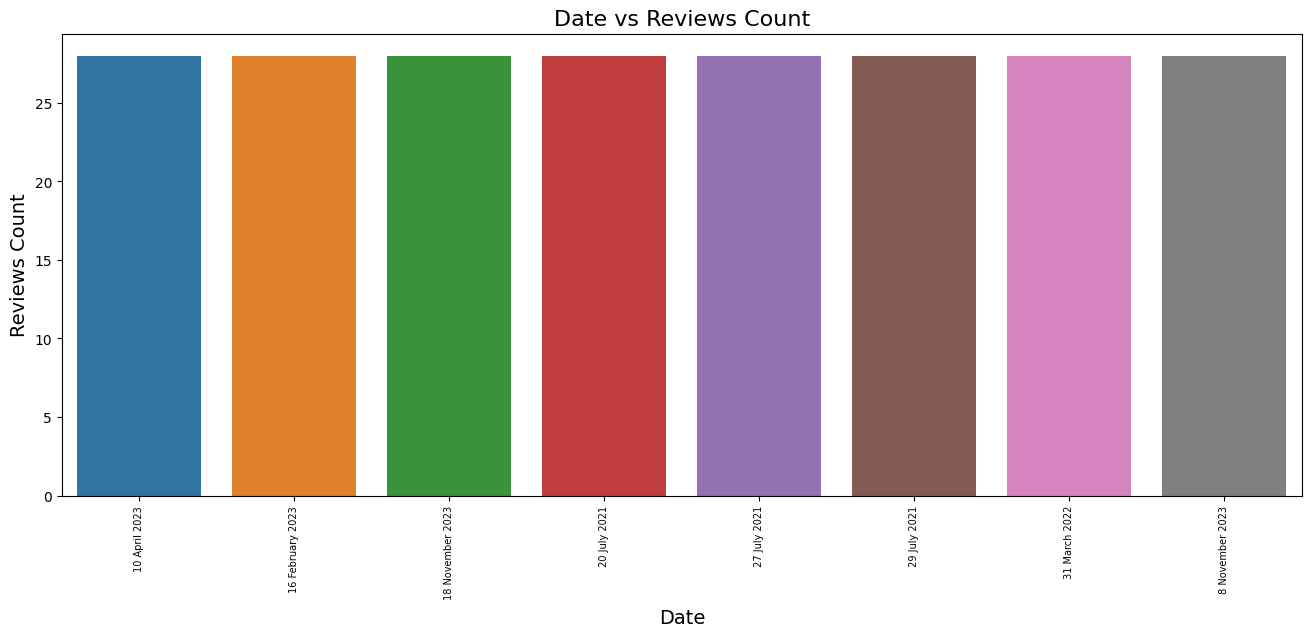

In [14]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

## Preprocessing for Sentiment Analysis

In [15]:
data=pd.DataFrame(reviews['Review'])
data

,Review
0,It is a great product and i am fully satisfied...
1,Product is good but but buy only if you have t...
2,This product touchscreen is working with Mac m...
3,The product is highly expensive than it's usab...
4,It's useful and portable. Overall no issues so...
...,...
219,The product is highly expensive than it's usab...
220,It's useful and portable. Overall no issues so...
221,Monitor is pretty good but do not buy from ama...
222,It is out of this world my dream of bezel less...


### Cleaning the text by removing irrelevant information

In [16]:
# function for Cleaning Text
import re     #Regular expressions, are a powerful tool for pattern matching and manipulation of strings
import string

def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))       # to match and replace any string that starts with '@' followed by alphanumeric characters
    text=re.sub('#','',str(text))       # removes hashtags
    # text=re.sub('RT[\s]+','',str(text))     #removes retweet indicators. It looks for the characters 'RT' followed by one or more whitespace characters 
    text = re.sub('^RT[\s]+', '', str(text))    #remove 'RT' at the beginning of the string
    text=re.sub('\n\n','',str(text))   # removes consecutive newline characters by replacing them with an empty string
    text=text.lower()       #  converts the entire text to lowercase
    text=re.sub('https?:\/\/\S+','',str(text))    # removes URLs from the text
    text=text.translate(str.maketrans('', '', string.punctuation))  # replaces each punctuation character with None
    text = re.sub("[0-9" "]+"," ",text)

    return text

data_filtered=data.copy()
data_filtered['Review_Clean']=data_filtered["Review"].apply(clean_text)
data_filtered

,Review,Review_Clean
0,It is a great product and i am fully satisfied...,it is a great product and i am fully satisfied...
1,Product is good but but buy only if you have t...,product is good but but buy only if you have t...
2,This product touchscreen is working with Mac m...,this product touchscreen is working with mac m...
3,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...
4,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...
...,...,...
219,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...
220,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...
221,Monitor is pretty good but do not buy from ama...,monitor is pretty good but do not buy from ama...
222,It is out of this world my dream of bezel less...,it is out of this world my dream of bezel less...


In [17]:
freq = pd.Series(' '.join(data_filtered['Review_Clean']).split()).value_counts()[:10] # for top 10
print(freq)

is       728
to       672
it       588
with     560
the      532
you      448
touch    420
type     420
not      420
and      364
Name: count, dtype: int64


### Stopwords

In [18]:
# create a list of stop words from a text file
with open (r"stop.txt","r") as sw:
    stop_words=sw.read()
stop_words=stop_words.split('\n')

print(stop_words)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

### Filtering Stopwords

In [19]:
# Filtering out stop words from the list of tokenized words
from nltk.tokenize import word_tokenize

# Function to remove stop words from a sentence
def remove_stopwords(sentence):
    # stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

# Apply the function to each row in the 'tweets' column
data_filtered['Review_no_sw'] = data_filtered['Review_Clean'].apply(remove_stopwords)

# Display the DataFrame
data_filtered


,Review,Review_Clean,Review_no_sw
0,It is a great product and i am fully satisfied...,it is a great product and i am fully satisfied...,great product fully satisfied till touch scree...
1,Product is good but but buy only if you have t...,product is good but but buy only if you have t...,product good buy type devices devices costly s...
2,This product touchscreen is working with Mac m...,this product touchscreen is working with mac m...,product touchscreen working mac mini thing goo...
3,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...,product highly expensive usability touch funct...
4,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...,portable issues sound monitor low bluetooth sp...
...,...,...,...
219,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...,product highly expensive usability touch funct...
220,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...,portable issues sound monitor low bluetooth sp...
221,Monitor is pretty good but do not buy from ama...,monitor is pretty good but do not buy from ama...,monitor pretty good buy amazon seller sends mo...
222,It is out of this world my dream of bezel less...,it is out of this world my dream of bezel less...,world dream bezel portable touch screen monito...


In [20]:
Review_no_sw=data_filtered['Review_no_sw']
freq_stp = pd.Series(' '.join(Review_no_sw).split()).value_counts()[:10] # for top 20
freq_stp

touch      420
type       420
good       336
monitor    308
hdmi       280
cable      252
read       224
product    196
connect    168
screen     168
Name: count, dtype: int64

## matrix of TF-IDF features. 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf=tf.fit_transform(Review_no_sw)
print(text_tf.shape)

dense=text_tf.todense()
denselist=dense.tolist()
feature_names=tf.get_feature_names_out()
print(feature_names[10:30],'\n')
df=pd.DataFrame(denselist,columns=feature_names)
print(df.iloc[:,10:17])
df

(224, 205)
['android' 'auto' 'back' 'bezel' 'big' 'bit' 'bluetooth' 'boot' 'box'
 'break' 'bucks' 'build' 'buy' 'buyingits' 'cable' 'cables' 'cad' 'call'
 'cameras' 'capable'] 

      android      auto     back     bezel      big       bit  bluetooth
0    0.132561  0.000000  0.06628  0.000000  0.00000  0.000000   0.051590
1    0.000000  0.000000  0.00000  0.000000  0.15812  0.000000   0.000000
2    0.000000  0.304774  0.00000  0.000000  0.00000  0.000000   0.000000
3    0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   0.000000
4    0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   0.335297
..        ...       ...      ...       ...      ...       ...        ...
219  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   0.000000
220  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   0.335297
221  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   0.000000
222  0.000000  0.000000  0.00000  0.139944  0.00000  0.000000   0.000000
223  0.000000  0.00

,accessories,accessory,accurate,additional,afford,air,alternate,aluminium,amaze,amazon,...,wont,work,worked,working,works,world,worst,year,youtube,zoom
0,0.06628,0.000000,0.06628,0.00000,0.00000,0.000000,0.06628,0.06628,0.000000,0.051590,...,0.06628,0.132561,0.000000,0.000000,0.198841,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.00000,0.15812,0.15812,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.237222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212442,0.272937,0.000000,0.000000
4,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212442,0.272937,0.000000,0.000000
220,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
221,0.00000,0.169554,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.263945,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
222,0.00000,0.000000,0.00000,0.00000,0.00000,0.139944,0.00000,0.00000,0.139944,0.000000,...,0.00000,0.000000,0.000000,0.217852,0.000000,0.139944,0.000000,0.000000,0.139944,0.139944


### Creating a Worlcloud

In [22]:
wordslist=" ".join(df)
print(wordslist)

wordslist_words=wordslist.split(' ')
print(len(wordslist_words))
print(wordslist_words)

accessories accessory accurate additional afford air alternate aluminium amaze amazon android auto back bezel big bit bluetooth boot box break bucks build buy buyingits cable cables cad call cameras capable carry charger charging color colors completed computer connect connected connectivity contents costly cover cpu designing devices deviceshdmi display disturb disturbing doesnt dont dream due duty easily easy effect expects expensive external facility feature fell finally find fine firestick fully function functionality gaming glossy good goodcons graphic great hackintosh hdmi highly hinges hit hope hz included input issues item jack job lag laptop leads light long low mac macbook machine magnetic make market mentioned menu mi mini mirror misses mobile mobilesso model monitor multi note onepros orif os outdated output page pc pd pen pencil perfectly pheonix phone picture pinch pixel plate play played portable power pretty price product protection providing quad quality read reduced r

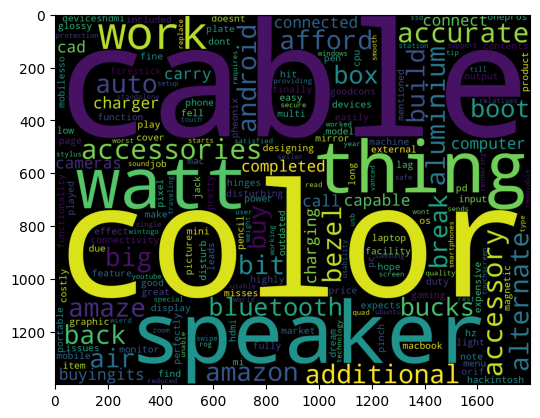

In [23]:
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='black',width=1800,height=1400).generate(wordslist)
plt.imshow(wordcloud)
plt.show()

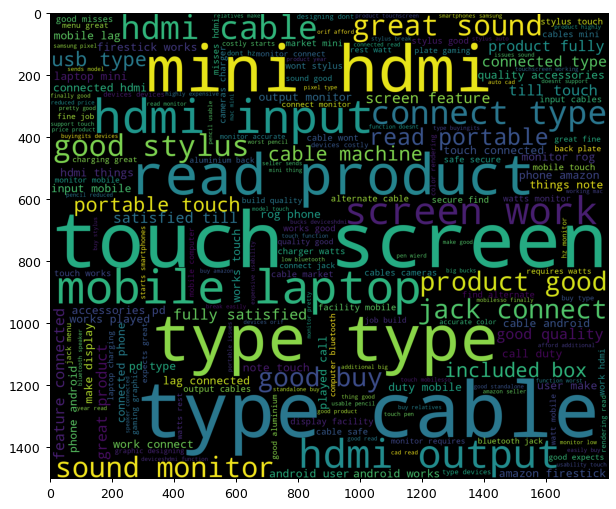

In [24]:
string_Total = " ".join(data_filtered['Review_no_sw'])     # 'tweets_no_sw',  "Text"
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

# Posative & Negative words

In [25]:
with open(r"positive-words.txt","r") as pos:
    positive=pos.read().split("\n")
positive_words=positive[35:]

print(positive_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [26]:
with open (r"negative-words.txt","r") as neg:
    negative=neg.read().split("\n")
negative_words=negative[35:]  

print(negative_words)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

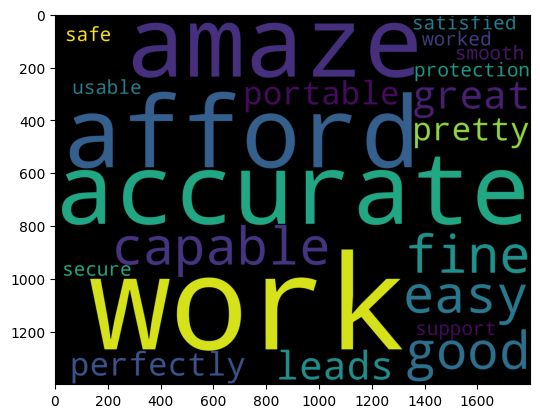

In [27]:
positive_Review=" ".join([word for word in df if word in positive_words])
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(positive_Review)
plt.imshow(pos_wordcloud)
plt.show()

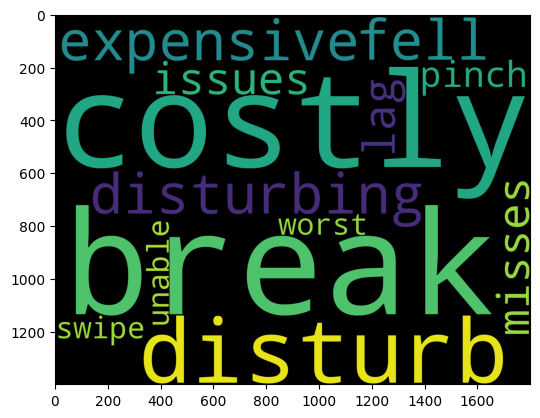

In [28]:
negative_Review=" ".join([word for word in df if word in negative_words])
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(negative_Review)
plt.imshow(neg_wordcloud)
plt.show()

# Sentimental analysis

In [29]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

data_filtered_SA=data_filtered.copy()
data_filtered_SA[["subjectivity", "polarity"]] = data_filtered_SA.apply(sentiment_analysis, axis=1)
data_filtered_SA

,Review,Review_Clean,Review_no_sw,subjectivity,polarity
0,It is a great product and i am fully satisfied...,it is a great product and i am fully satisfied...,great product fully satisfied till touch scree...,0.585662,0.267372
1,Product is good but but buy only if you have t...,product is good but but buy only if you have t...,product good buy type devices devices costly s...,0.576923,0.246154
2,This product touchscreen is working with Mac m...,this product touchscreen is working with mac m...,product touchscreen working mac mini thing goo...,0.706667,0.116667
3,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...,product highly expensive usability touch funct...,0.553333,-0.100000
4,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...,portable issues sound monitor low bluetooth sp...,0.366667,0.216667
...,...,...,...,...,...
219,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...,product highly expensive usability touch funct...,0.553333,-0.100000
220,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...,portable issues sound monitor low bluetooth sp...,0.366667,0.216667
221,Monitor is pretty good but do not buy from ama...,monitor is pretty good but do not buy from ama...,monitor pretty good buy amazon seller sends mo...,0.556803,0.136224
222,It is out of this world my dream of bezel less...,it is out of this world my dream of bezel less...,world dream bezel portable touch screen monito...,0.377778,0.138889


In [30]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data_filtered_SA["analysis"] = data_filtered_SA["polarity"].apply(analysis)
data_filtered_SA

,Review,Review_Clean,Review_no_sw,subjectivity,polarity,analysis
0,It is a great product and i am fully satisfied...,it is a great product and i am fully satisfied...,great product fully satisfied till touch scree...,0.585662,0.267372,Positive
1,Product is good but but buy only if you have t...,product is good but but buy only if you have t...,product good buy type devices devices costly s...,0.576923,0.246154,Positive
2,This product touchscreen is working with Mac m...,this product touchscreen is working with mac m...,product touchscreen working mac mini thing goo...,0.706667,0.116667,Positive
3,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...,product highly expensive usability touch funct...,0.553333,-0.100000,Negative
4,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...,portable issues sound monitor low bluetooth sp...,0.366667,0.216667,Positive
...,...,...,...,...,...,...
219,The product is highly expensive than it's usab...,the product is highly expensive than its usabi...,product highly expensive usability touch funct...,0.553333,-0.100000,Negative
220,It's useful and portable. Overall no issues so...,its useful and portable overall no issues so f...,portable issues sound monitor low bluetooth sp...,0.366667,0.216667,Positive
221,Monitor is pretty good but do not buy from ama...,monitor is pretty good but do not buy from ama...,monitor pretty good buy amazon seller sends mo...,0.556803,0.136224,Positive
222,It is out of this world my dream of bezel less...,it is out of this world my dream of bezel less...,world dream bezel portable touch screen monito...,0.377778,0.138889,Positive


In [31]:
data_filtered_SA["polarity"].value_counts()

polarity
 0.267372    28
 0.246154    28
 0.116667    28
-0.100000    28
 0.216667    28
 0.136224    28
 0.138889    28
 0.012302    28
Name: count, dtype: int64

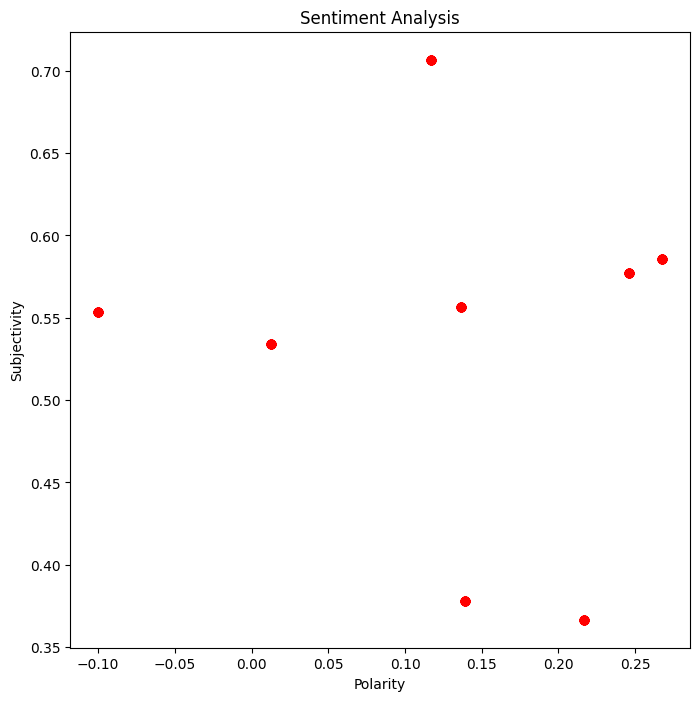

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(data_filtered_SA["polarity"], data_filtered_SA["subjectivity"], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [33]:
data_filtered_SA["analysis"].value_counts()

analysis
Positive    196
Negative     28
Name: count, dtype: int64

In [48]:
#positive tweets
((196)/224)*100

87.5

In [49]:
#negative tweets
(28/224)*100

12.5

# New Product

In [36]:
# Product_URL='https://www.amazon.in/24-Carat-Rhodium-Plated-AUGUST1051/dp/B016DK3FTS/ref=cm_cr_srp_d_product_top?ie=UTF8'
# Product_Review_URL='https://www.amazon.in/24-Carat-Rhodium-Plated-AUGUST1051/dp/B016DK3FTS/ref=cm_cr_srp_d_product_top?ie=UTF8#customerReviews'

In [37]:
Product_URL='https://www.amazon.in/dp/B07D9G1GHB/ref=cm_cr_lh_d_bdcrb_top?ie=UTF8&th=1'
Product_Review_URL='https://www.amazon.in/dp/B07D9G1GHB/ref=cm_cr_lh_d_bdcrb_top?ie=UTF8&th=1'

In [38]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': Product_URL,
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass
    
    
for x in tqdm_notebook(range(160)):
    soup = get_soup(Product_Review_URL)
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [39]:
df = pd.DataFrame(reviewlist)
df.to_csv("Amazon_Product_Review.csv")
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nvery good product,5.0,its value for money and look stylish\nRead more,Reviewed in India on 3 November 2023
1,1.0 out of 5 stars\nThird class product,1.0,Very third class productAfter one day of my us...,Reviewed in India on 20 November 2023
2,3.0 out of 5 stars\nAn ordinary watch but is f...,3.0,I purchased it for Rs. 349 on festival sale. T...,Reviewed in India on 16 October 2018
3,4.0 out of 5 stars\nlook,4.0,look is good for some time like 6 to 7 months ...,Reviewed in India on 17 October 2023
4,5.0 out of 5 stars\nValue for money,5.0,"Built quality, water resistant and quality is ...",Reviewed in India on 13 November 2023
...,...,...,...,...
163,4.0 out of 5 stars\nlook,4.0,look is good for some time like 6 to 7 months ...,Reviewed in India on 17 October 2023
164,5.0 out of 5 stars\nValue for money,5.0,"Built quality, water resistant and quality is ...",Reviewed in India on 13 November 2023
165,2.0 out of 5 stars\nGood product,2.0,Average product does not fullfill my requireme...,Reviewed in India on 24 October 2023
166,5.0 out of 5 stars\nLove it,5.0,This is the best watch at this price. . I love...,Reviewed in India on 5 November 2023


In [40]:
reviews = pd.read_csv('Amazon_Product_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
print(reviews.Rating.describe())
reviews

count    168.000000
mean       3.250000
std        1.644261
min        1.000000
25%        1.750000
50%        3.500000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64


,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nvery good product,5.0,its value for money and look stylish\nRead more,Reviewed in India on 3 November 2023
1,1.0 out of 5 stars\nThird class product,1.0,Very third class productAfter one day of my us...,Reviewed in India on 20 November 2023
2,3.0 out of 5 stars\nAn ordinary watch but is f...,3.0,I purchased it for Rs. 349 on festival sale. T...,Reviewed in India on 16 October 2018
3,4.0 out of 5 stars\nlook,4.0,look is good for some time like 6 to 7 months ...,Reviewed in India on 17 October 2023
4,5.0 out of 5 stars\nValue for money,5.0,"Built quality, water resistant and quality is ...",Reviewed in India on 13 November 2023
...,...,...,...,...
163,4.0 out of 5 stars\nlook,4.0,look is good for some time like 6 to 7 months ...,Reviewed in India on 17 October 2023
164,5.0 out of 5 stars\nValue for money,5.0,"Built quality, water resistant and quality is ...",Reviewed in India on 13 November 2023
165,2.0 out of 5 stars\nGood product,2.0,Average product does not fullfill my requireme...,Reviewed in India on 24 October 2023
166,5.0 out of 5 stars\nLove it,5.0,This is the best watch at this price. . I love...,Reviewed in India on 5 November 2023


In [41]:
data=pd.DataFrame(reviews['Review'])
data

,Review
0,its value for money and look stylish\nRead more
1,Very third class productAfter one day of my us...
2,I purchased it for Rs. 349 on festival sale. T...
3,look is good for some time like 6 to 7 months ...
4,"Built quality, water resistant and quality is ..."
...,...
163,look is good for some time like 6 to 7 months ...
164,"Built quality, water resistant and quality is ..."
165,Average product does not fullfill my requireme...
166,This is the best watch at this price. . I love...


In [42]:
# function for Cleaning Text
import re     #Regular expressions, are a powerful tool for pattern matching and manipulation of strings
import string

def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))       # to match and replace any string that starts with '@' followed by alphanumeric characters
    text=re.sub('#','',str(text))       # removes hashtags
    # text=re.sub('RT[\s]+','',str(text))     #removes retweet indicators. It looks for the characters 'RT' followed by one or more whitespace characters 
    text = re.sub('^RT[\s]+', '', str(text))    #remove 'RT' at the beginning of the string
    text=re.sub('\n\n','',str(text))   # removes consecutive newline characters by replacing them with an empty string
    text=text.lower()       #  converts the entire text to lowercase
    text=re.sub('https?:\/\/\S+','',str(text))    # removes URLs from the text
    text=text.translate(str.maketrans('', '', string.punctuation))  # replaces each punctuation character with None
    text = re.sub("[0-9" "]+"," ",text)

    return text

data_filtered=data.copy()
data_filtered['Review_Clean']=data_filtered["Review"].apply(clean_text)
data_filtered

,Review,Review_Clean
0,its value for money and look stylish\nRead more,its value for money and look stylish\nread more
1,Very third class productAfter one day of my us...,very third class productafter one day of my us...
2,I purchased it for Rs. 349 on festival sale. T...,i purchased it for rs on festival sale the p...
3,look is good for some time like 6 to 7 months ...,look is good for some time like to months ...
4,"Built quality, water resistant and quality is ...",built quality water resistant and quality is g...
...,...,...
163,look is good for some time like 6 to 7 months ...,look is good for some time like to months ...
164,"Built quality, water resistant and quality is ...",built quality water resistant and quality is g...
165,Average product does not fullfill my requireme...,average product does not fullfill my requireme...
166,This is the best watch at this price. . I love...,this is the best watch at this price i love i...


In [43]:
# Filtering out stop words from the list of tokenized words
from nltk.tokenize import word_tokenize

# Function to remove stop words from a sentence
def remove_stopwords(sentence):
    # stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

# Apply the function to each row in the 'tweets' column
data_filtered['Review_no_sw'] = data_filtered['Review_Clean'].apply(remove_stopwords)

# Display the DataFrame
data_filtered

,Review,Review_Clean,Review_no_sw
0,its value for money and look stylish\nRead more,its value for money and look stylish\nread more,money stylish read
1,Very third class productAfter one day of my us...,very third class productafter one day of my us...,class productafter day automatic stop sad loss...
2,I purchased it for Rs. 349 on festival sale. T...,i purchased it for rs on festival sale the p...,purchased rs festival sale printed price rs pr...
3,look is good for some time like 6 to 7 months ...,look is good for some time like to months ...,good time months shine lost read
4,"Built quality, water resistant and quality is ...",built quality water resistant and quality is g...,built quality water resistant quality good read
...,...,...,...
163,look is good for some time like 6 to 7 months ...,look is good for some time like to months ...,good time months shine lost read
164,"Built quality, water resistant and quality is ...",built quality water resistant and quality is g...,built quality water resistant quality good read
165,Average product does not fullfill my requireme...,average product does not fullfill my requireme...,average product fullfill requirement read
166,This is the best watch at this price. . I love...,this is the best watch at this price i love i...,watch price love design battery good read


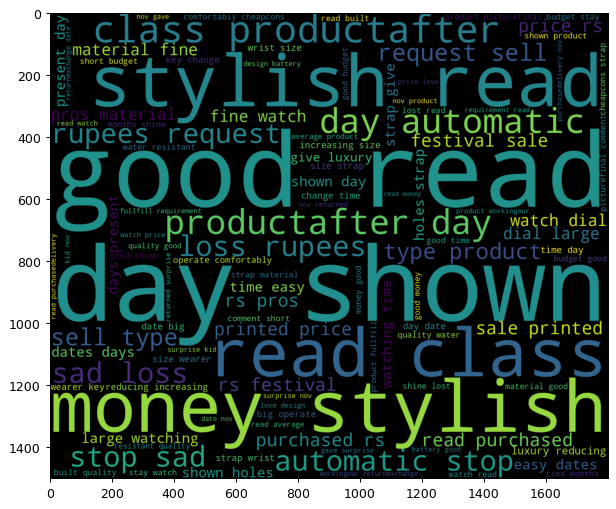

In [44]:
string_Total = " ".join(data_filtered['Review_no_sw'])     # 'tweets_no_sw',  "Text"
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

## sentiment_analysis

In [45]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

data_filtered_SA=data_filtered.copy()
data_filtered_SA[["subjectivity", "polarity"]] = data_filtered_SA.apply(sentiment_analysis, axis=1)
data_filtered_SA

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data_filtered_SA["analysis"] = data_filtered_SA["polarity"].apply(analysis)
data_filtered_SA

,Review,Review_Clean,Review_no_sw,subjectivity,polarity,analysis
0,its value for money and look stylish\nRead more,its value for money and look stylish\nread more,money stylish read,0.750000,0.500000,Positive
1,Very third class productAfter one day of my us...,very third class productafter one day of my us...,class productafter day automatic stop sad loss...,0.500000,-0.050000,Negative
2,I purchased it for Rs. 349 on festival sale. T...,i purchased it for rs on festival sale the p...,purchased rs festival sale printed price rs pr...,0.511688,0.255844,Positive
3,look is good for some time like 6 to 7 months ...,look is good for some time like to months ...,good time months shine lost read,0.550000,0.600000,Positive
4,"Built quality, water resistant and quality is ...",built quality water resistant and quality is g...,built quality water resistant quality good read,0.550000,0.600000,Positive
...,...,...,...,...,...,...
163,look is good for some time like 6 to 7 months ...,look is good for some time like to months ...,good time months shine lost read,0.550000,0.600000,Positive
164,"Built quality, water resistant and quality is ...",built quality water resistant and quality is g...,built quality water resistant quality good read,0.550000,0.600000,Positive
165,Average product does not fullfill my requireme...,average product does not fullfill my requireme...,average product fullfill requirement read,0.450000,0.175000,Positive
166,This is the best watch at this price. . I love...,this is the best watch at this price i love i...,watch price love design battery good read,0.500000,0.675000,Positive


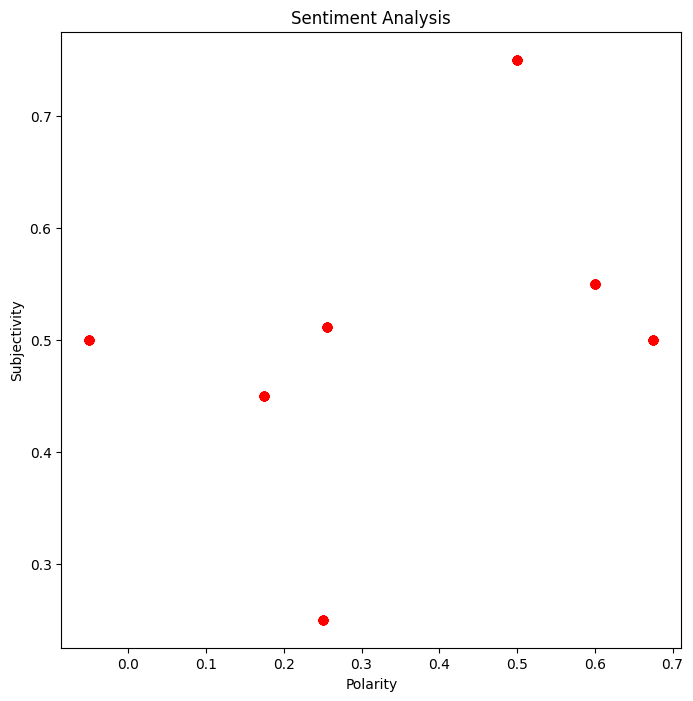

In [46]:
plt.figure(figsize=(8, 8))
plt.scatter(data_filtered_SA["polarity"], data_filtered_SA["subjectivity"], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [47]:
data_filtered_SA["analysis"].value_counts()

analysis
Positive    147
Negative     21
Name: count, dtype: int64